In [2]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import plot as pltfn
import admin_functions as adfn
from scipy import stats 

sns.reset_orig()
#plt.style.use('dark_background')

%load_ext autoreload
%autoreload
 
# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [11]:
type(np.load(prac[0])[0][0])

numpy.int64

## PLOT1
### How do parameter combinations effect power law distributions 

* alter: firing probability and avalanche neighbour binning
* measure: exponent and log likelihood ratio

In [3]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
g_p_l = sorted(glob.glob('*sizeparamsweepgroupp_log*'))
g_tp0_l = sorted(glob.glob('*sizeparamsweepgrouptp0_log*'))
g_tp3_l = sorted(glob.glob('*sizeparamsweepgrouptp3_log*'))
g_p_e = sorted(glob.glob('*sizeparamsweepgroupp_exp*'))
g_p_lpos = sorted(glob.glob('*sizeparamsweepgroupp_log+*'))
g_p_lpos

['sizeparamsweepgroupp_log+.npy']

In [47]:
#==========================================================================
def powerfit(Fdrop, experiment, data):
#==========================================================================
    import os
    import numpy as np
    import glob
    import powerlaw
    cutoff = 3
    param = np.zeros((4))
    maxi = np.max(np.unique(data, return_counts = True)[0][np.unique(data, return_counts = True)[1] > cutoff]) 
    fit = powerlaw.Fit(data, discrete = True) #fit power law to data - MLE    
    alpha = fit.power_law.alpha
    sigma = fit.power_law.sigma
    R, p = fit.distribution_compare('truncated_power_law', 'lognormal', normalized_ratio=True)
    param[0],param[1] = R,p
    param[2],param[3]= alpha, sigma
    return(param)
avlist = list(range(len(blnli)))
for i in range(len(blnli)):
    avlist[i] = powerfit(Fdrop, experiment, np.load(blnli[i])[0])
    

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
/Users/dominicburrows/Applications/anaconda3/lib/python3.7/site-packages/powerlaw.py:1560: RuntimeWarning: invalid value encountered in true_divide
  return likelihoods/norm
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


In [ ]:
#==========================================================================
def powerfit(Fdrop, experiment, data):
#==========================================================================
    import os
    import numpy as np
    import glob
    import powerlaw
    param = np.zeros((4))
    fit = powerlaw.Fit(data, discrete = True) #fit power law to data - MLE    
    alpha = fit.power_law.alpha
    sigma = fit.power_law.sigma
    R, p = fit.distribution_compare('power_law', 'lognormal', normalized_ratio=True)
    param[0],param[1] = R,p
    param[2],param[3]= alpha, sigma
    return(param)

shape = 320
avlist = list(range(shape))
nums = adfn.name(F10t, experiment, 2, 12)
for t in nums:
    itav = sorted(glob.glob('*E-' + str(t) + '*nnbav.npy*')) 
    for i in range(len(itav)): 
        avlist[i] = powerfit(Fdrop, experiment, np.load(itav[i])[0])
    np.save(Fdrop + 'Project/' + experiment + os.sep + itav[i][:itav[i].find('run')+6] + 'sizeparamsweepp_log', avlist)
    print('Done fish num ' + str(f))     

### Plot parameter sweep 
* BCL - threshold - provide actual model values (explain in legend)
* percentile of closest cells

In [3]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
coordli = sorted(glob.glob('*BLN*realcoord.npy*')) 
sparli = sorted(glob.glob('*sizeparamsweeptp3_log*')) 
dparli = sorted(glob.glob('*durparam*1*'))
avli = sorted(glob.glob('*0.550bin0.10nnbav*'))
avli

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-06_2pho

In [ ]:
#Minimum deviation from 2
from sklearn.metrics import mean_squared_error
import heapq

shape = np.load(sparli[0]).shape[0]
expsum = np.zeros((len(sparli),shape))
error = np.full((shape), 1000.0)
extrue = np.full((11), 2.0)
for i in range(shape):
    for t in range(len(sparli)):
        expsum[t,i] = np.load(sparli[t])[i,2]
    if np.isnan(np.sum(expsum)) == False:
        error[i] = mean_squared_error(extrue,expsum[:,i])
        
loc1 = np.where(error == heapq.nsmallest(1, error)[-1]) #smallest
loc2 = np.where(error == heapq.nsmallest(8, error)[-1]) #second smallest

/Users/dominicburrows/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


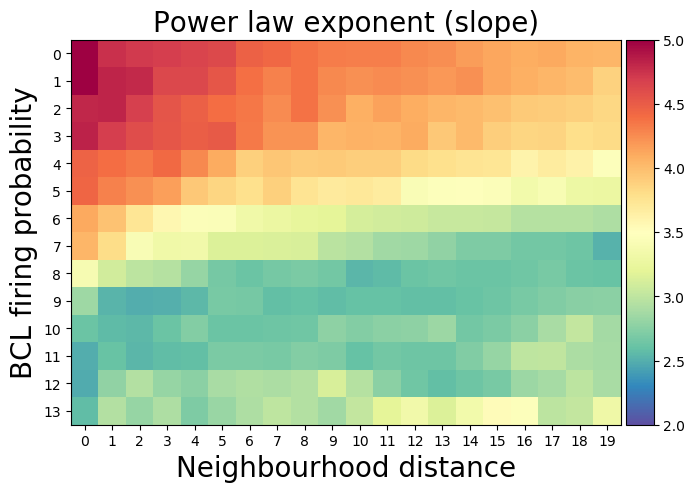

In [77]:
#CALCULATE AVERAGE PLOT
#-----------------------
shape = np.load(sparli[0]).shape[0]
expsum = np.zeros((shape))
for i in range(shape):
    evec = []
    for t in range(len(sparli)):
        evec = np.append(evec, np.load(sparli[t])[i,2])
    evec[np.where(np.isnan(evec) == True)[0]] = 0
    if np.sum(evec == 0) > 0: expsum[i] = np.sum(evec)/(len(evec) - np.sum(evec == 0)) 
    else: expsum[i] = np.sum(evec)/len(evec)

from mpl_toolkits.axes_grid1 import make_axes_locatable
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(expsum.shape[0]/nnbs)
expav = expsum.reshape((bcls,nnbs))    
plot1 = ax.imshow(expav[:14], cmap = 'Spectral_r', vmin = 2, vmax = 5)
ax.set_title('Power law exponent (slope)', size = '20')
ax.set_xlabel('Neighbourhood distance', size = '20')
ax.set_ylabel('BCL firing probability', size = '20')
ax.locator_params(axis='y', nbins=21)
ax.locator_params(axis='x', nbins=20)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0)
os.chdir(Ffig)
plt.savefig('exponent.png')
plt.show()

In [ ]:
#CALCULATE AVERAGE PLOT
#-----------------------
shape = np.load(sparli[0]).shape[0]
expsum = np.zeros((shape))
for i in range(shape):
    evec = []
    for t in range(len(sparli)):
        evec = np.append(evec, np.load(sparli[t])[i,2])
    evec[np.where(np.isnan(evec) == True)[0]] = 0
    if np.sum(evec == 0) > 0: expsum[i] = np.sum(evec)/(len(evec) - np.sum(evec == 0)) 
    else: expsum[i] = np.sum(evec)/len(evec)

from mpl_toolkits.axes_grid1 import make_axes_locatable
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(expsum.shape[0]/nnbs)
expav = expsum.reshape((bcls,nnbs))    
plot1 = ax.imshow(expav[:14], cmap = 'Spectral_r', vmin = 2, vmax = 5)
ax.set_title('Power law exponent (slope)', size = '20')
ax.set_xlabel('Neighbourhood distance', size = '20')
ax.set_ylabel('BCL firing probability', size = '20')
ax.locator_params(axis='y', nbins=21)
ax.locator_params(axis='x', nbins=20)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0)
os.chdir(Ffig)
plt.savefig('exponent.png')
plt.show()

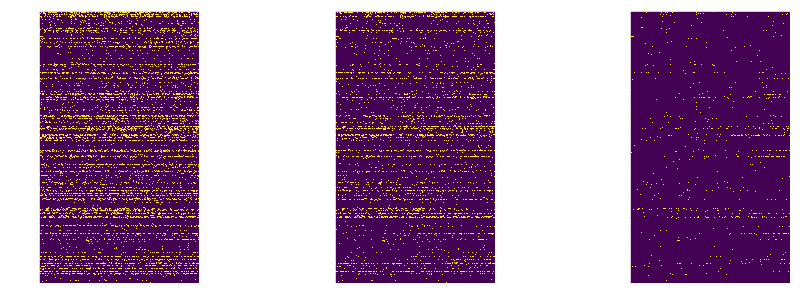

In [200]:
b1,b2,b3 =  sorted(glob.glob('*BLN*0.550binarised.npy')),sorted(glob.glob('*BLN*0.630binarised.npy')),sorted(glob.glob('*BLN*0.650binarised.npy'))
f, ax = plt.subplots(1,3, figsize = (15,5))
ax[0].imshow(np.load(b3[0]))
ax[1].imshow(np.load(b2[0]))
ax[2].imshow(np.load(b1[0]))
plt.show()

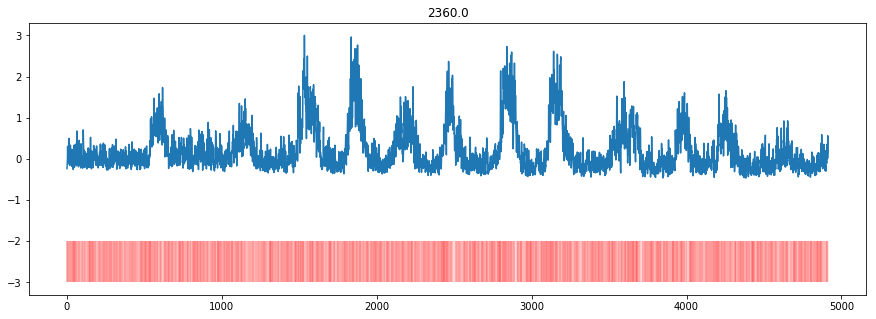

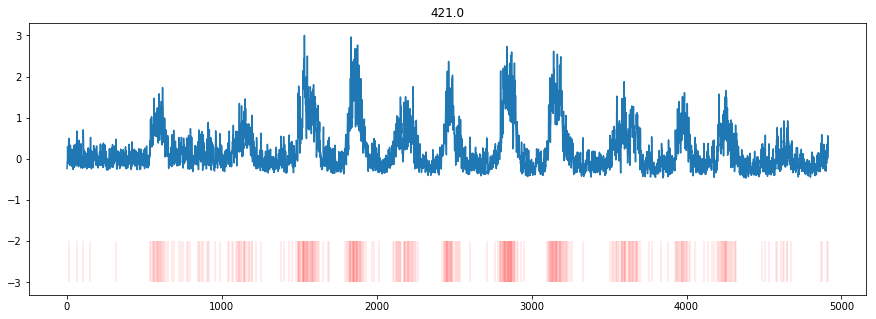

In [47]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
c = 9
os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.650binarised.npy'))
callist = sorted(glob.glob('*BLN*0.650modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c])))
plt.savefig('highbin.png', transparent = True)


os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.590binarised.npy'))
callist = sorted(glob.glob('*BLN*0.590modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c])
#plt.plot(np.load(callist[0])[c])
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c])))
plt.savefig('correctbin.png', transparent = True)

plt.show()

## PLOT2
### AVALANCHE SIZE, DURATION AND SIZE VS DURATION
* use pdf or ccdf?
* choose parameter values which give expected exponent value

* Plot average distribution (concatenated, sd shading), and null distribution (concatenated, sd shading)
* plot individual distributions

In [107]:
os.chdir(Fdrop + 'Project/' + experiment)
blnli = sorted(glob.glob('*BLN*0.590bin0.10nnbav.npy*')) 
null1 = sorted(glob.glob('*nnbav_shuffle*')) 
null2 = sorted(glob.glob('*nnbav_swap*')) 
null3 = sorted(glob.glob('*nnbav_slide*'))
np.load(null1[0])

array([[3, 3, 5, ..., 3, 3, 3],
       [1, 1, 2, ..., 1, 2, 2]])

In [ ]:
f, axarr = plt.subplots(figsize = (12,8))
bhist = np.histogram(combvec, bins = binned)
xaxis = np.log10(bhist[1][:-1])
yaxis = np.log10(bhist[0]/np.sum(hist[0]))
plt.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 1)

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


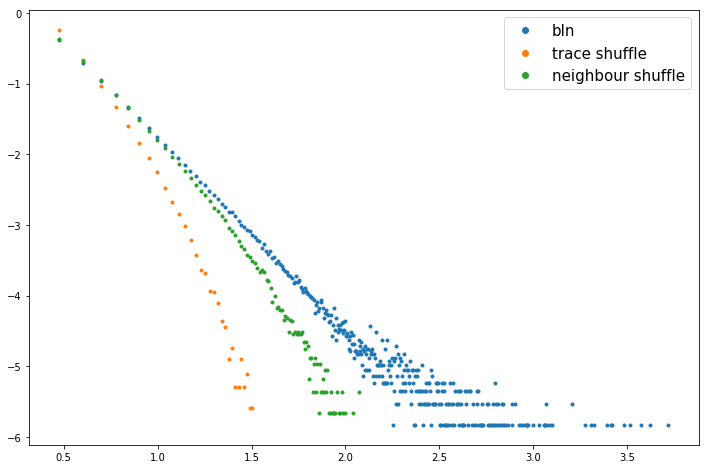

In [102]:
#PDF - CONCATENATE
#--------------------------
combvec = []
f, axarr = plt.subplots(figsize = (12,8))
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
for i in range(len(blnli)):
    combvec = np.append(combvec, np.load(blnli[i])[0])
mini = np.min(combvec)
maxi = np.max(combvec)
binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
bhist = np.histogram(combvec, bins = binned)
xaxis = np.log10(bhist[1][:-1])
yaxis = np.log10(bhist[0]/np.sum(bhist[0]))
plt.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 3, label = 'bln')
xaxis = np.log10(n1hist[1][:-1])
yaxis = np.log10(n1hist[0]/np.sum(n1hist[0]))
plt.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 3, label = 'trace shuffle')
xaxis = np.log10(n2hist[1][:-1])
yaxis = np.log10(n2hist[0]/np.sum(hist[0]))
plt.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 3, label = 'neighbour shuffle')
axarr.legend(loc = 1, markerscale = 2,prop={'size': 15})
os.chdir(Ffig)
plt.savefig('powerlaw_nulls.png', transparent = True)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


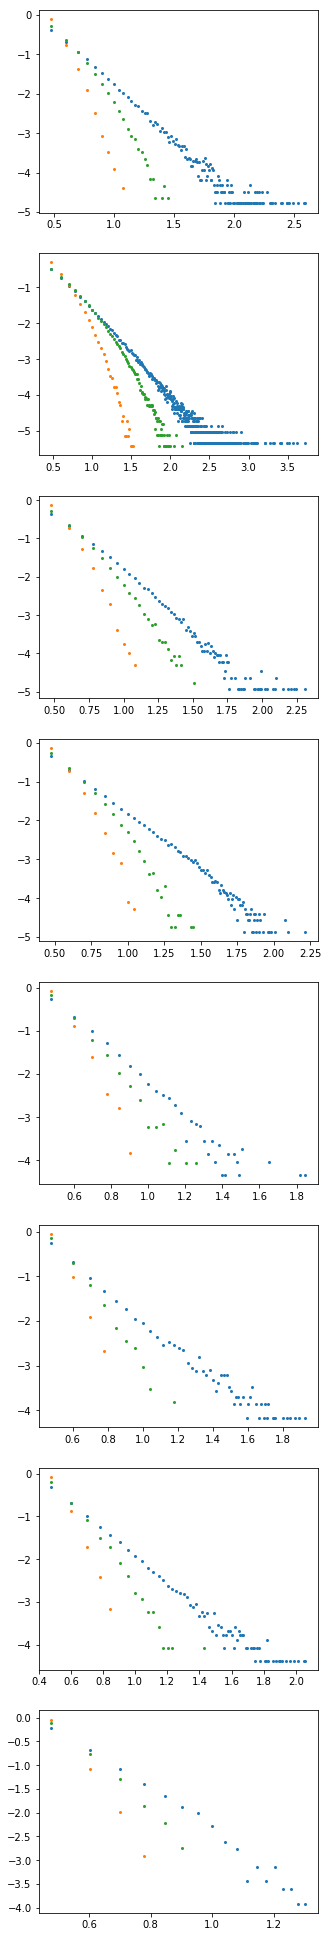

In [108]:
f, axarr = plt.subplots(8,1, figsize = (5,35))
for i in range(8):
    b = np.load(blnli[i])[0]
    n1 = np.load(null1[i])[0]
    n2 = np.load(null2[i])[0]
    combvec = np.append(b, np.append(n1, n2))
    mini = np.min(combvec)
    maxi = np.max(combvec)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 5000)
    bhi, n1hi, n2hi = np.histogram(b, bins = binned),np.histogram(n1, bins = binned),np.histogram(n2, bins = binned)
    bxaxis, n1xaxis, n2xaxis = np.log10(bhi[1][:-1]),np.log10(n1hi[1][:-1]),np.log10(n2hi[1][:-1])
    byaxis, n1yaxis, n2yaxis = np.log10(bhi[0]/np.sum(bhi[0])), np.log10(n1hi[0]/np.sum(n1hi[0])), np.log10(n2hi[0]/np.sum(n2hi[0]))
    axarr[i].plot(bxaxis[:len(bxaxis)-1], byaxis[:len(bxaxis)-1], 'o', linewidth = 1, markersize = 2)
    axarr[i].plot(n1xaxis[:len(n1xaxis)-1], n1yaxis[:len(n1xaxis)-1], 'o', linewidth = 1, markersize = 2)
    axarr[i].plot(n2xaxis[:len(n2xaxis)-1], n2yaxis[:len(n2xaxis)-1], 'o', linewidth = 1, markersize = 2)
#os.chdir(Ffig)
#plt.savefig('powerlawsingle_nulls.png', transparent = True)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


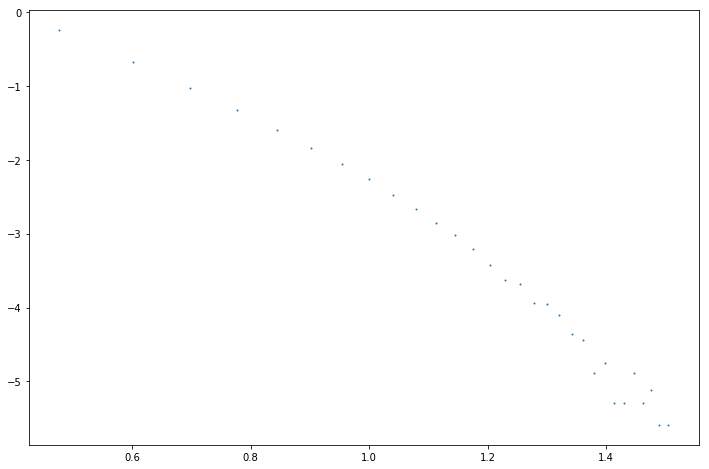

In [70]:
#PDF - CONCATENATE
#--------------------------
combvec = []
f, axarr = plt.subplots(figsize = (12,8))
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
for i in range(len(null1)):
    combvec = np.append(combvec, np.load(null1[i])[0])
mini = np.min(combvec)
maxi = np.max(combvec)
binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
n1hist = np.histogram(combvec, bins = binned)
xaxis = np.log10(n1hist[1][:-1])
yaxis = np.log10(n1hist[0]/np.sum(n1hist[0]))
plt.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 1)

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


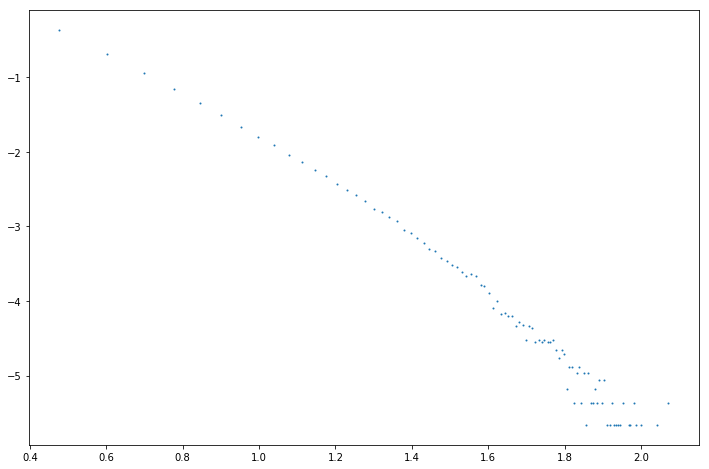

In [71]:
#PDF - CONCATENATE
#--------------------------
combvec = []
f, axarr = plt.subplots(figsize = (12,8))
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
for i in range(len(null2)):
    combvec = np.append(combvec, np.load(null2[i])[0])
mini = np.min(combvec)
maxi = np.max(combvec)
binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
n2hist = np.histogram(combvec, bins = binned)
xaxis = np.log10(n2hist[1][:-1])
yaxis = np.log10(n2hist[0]/np.sum(hist[0]))
plt.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 1)

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


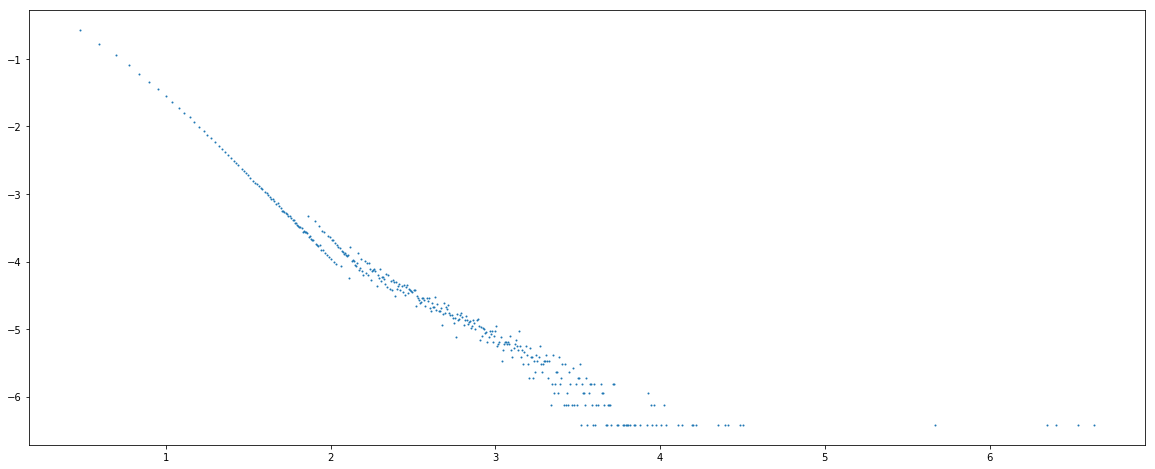

In [34]:
#PDF - CONCATENATE
#--------------------------
combvec = []
f, axarr = plt.subplots(figsize = (20,8))
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
for i in range(len(blnli1)):
    combvec = np.append(combvec, np.load(blnli1[i])[0])
mini = np.min(combvec)
maxi = np.max(combvec)
binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
hist = np.histogram(combvec, bins = binned)
xaxis = np.log10(hist[1][:-1])
yaxis = np.log10(hist[0]/np.sum(hist[0]))
plt.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 1)

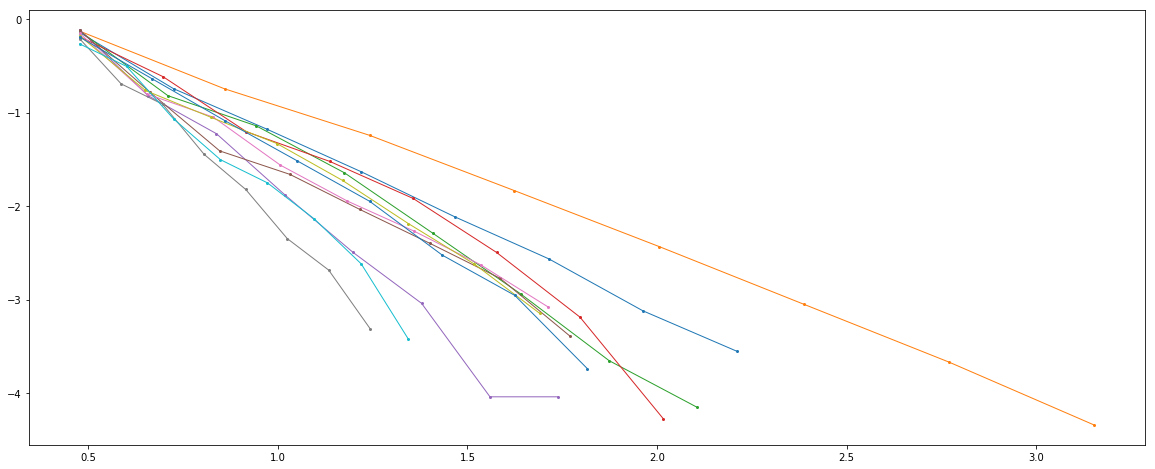

In [20]:
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
fig, axarr = plt.subplots(figsize = (20,8))
for i in range(len(blnli)):
    avdistcut = np.load(blnli[i])[0]
    mini = np.min(avdistcut)
    maxi = np.max(avdistcut)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 10)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-o', linewidth = 1, markersize = 2)

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


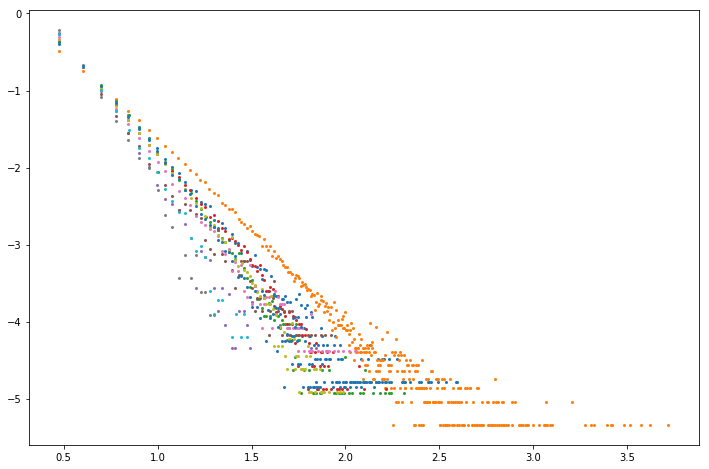

In [50]:
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
fig, axarr = plt.subplots(figsize = (12,8))
for i in range(len(blnli)):
    avdistcut = np.load(blnli[i])[0]
    mini = np.min(avdistcut)
    maxi = np.max(avdistcut)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 2)
os.chdir(Ffig)
plt.savefig('powerlaw_0.590bin.png', transparent = True)

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


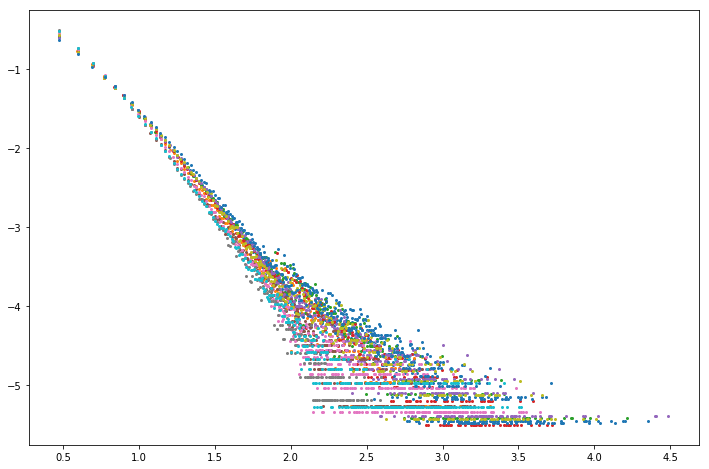

In [52]:
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
fig, axarr = plt.subplots(figsize = (12,8))
for i in range(len(blnli1)):
    avdistcut = np.load(blnli1[i])[0]
    mini = np.min(avdistcut)
    maxi = np.max(avdistcut)
    binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 2)
os.chdir(Ffig)
plt.savefig('powerlaw_0.65bin.png', transparent = True)

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


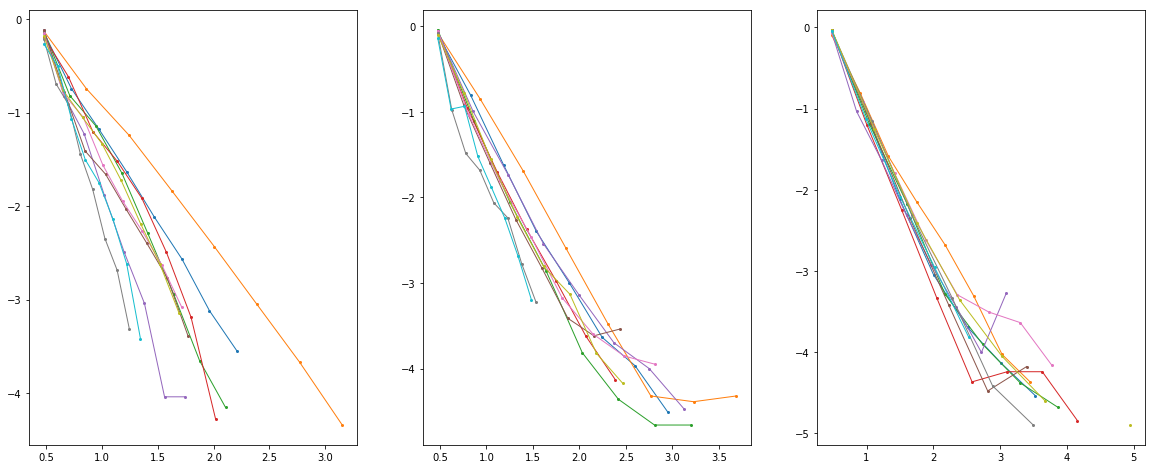

In [45]:
os.chdir(Fdrop + 'Project/' + experiment)
f, axarr = plt.subplots(1,3, figsize = (20,8))
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
for t in range(0,3):
    avlist = (blnli2[:10], p5li, p20li)
    for i in range(len(blnli2[:10])):
        avdistcut = np.load(avlist[t][i])[0]
        mini = np.min(avdistcut)
        maxi = np.max(avdistcut)
        binned=np.logspace(np.log10(mini),np.log10(maxi), 10)
        hist = np.histogram(avdistcut, bins = binned)
        xaxis = np.log10(hist[1][:-1])
        yaxis = np.log10(hist[0]/np.sum(hist[0]))
        axarr[t].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 2, linestyle = '-' )

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


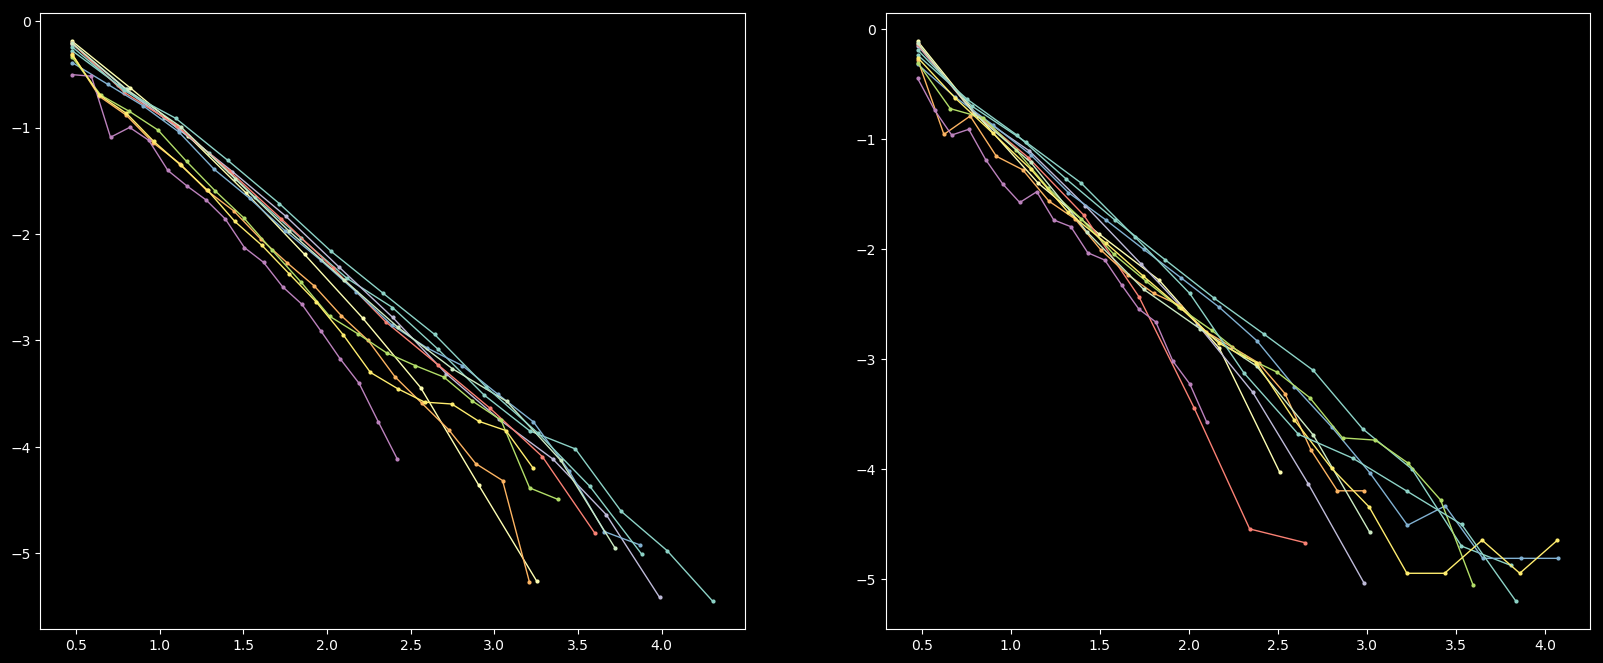

In [172]:
f, axarr = plt.subplots(1,2, figsize = (20,8), gridspec_kw={'width_ratios': [1, 1]})
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
for t in range(0,2):
    avlist = (avli1, avli2)
    for i in range(len(avli1)):
        avdistcut = np.load(avlist[t][i])[0]
        mini = np.min(avdistcut)
        maxi = np.max(avdistcut)
        binned=np.logspace(np.log10(mini),np.log10(maxi), 20)
        hist = np.histogram(avdistcut, bins = binned)
        xaxis = np.log10(hist[1][:-1])
        yaxis = np.log10(hist[0]/np.sum(hist[0]))
        axarr[t].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 2, linestyle = '-' )

In [ ]:
f, axarr = plt.subplots(1,2, figsize = (20,8), gridspec_kw={'width_ratios': [1, 1]})
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
for t in range(0,2):
    avlist = (avli1)
    for i in range(len(avli1)):
        avdistcut = np.load(avlist[t][i])[0]
        mini = np.min(avdistcut)
        maxi = np.max(avdistcut)
        binned=np.logspace(np.log10(mini),np.log10(maxi), 20)
        hist = np.histogram(avdistcut, bins = binned)
        xaxis = np.log10(hist[1][:-1])
        yaxis = np.log10(hist[0]/np.sum(hist[0]))
        axarr[t].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 2, linestyle = '-' )

In [ ]:
#PDF - CONCATENATE
#--------------------------
combvec = []
for i in range(len(avlist)):
    combvec = np.append(combvec, np.load(avlist[i])[0])
mini = np.min(combvec)
maxi = np.max(combvec)
binned=np.logspace(np.log10(mini),np.log10(maxi), 50)
hist = np.histogram(combvec, bins = binned)
xaxis = np.log10(hist[1][:-1])
yaxis = np.log10(hist[0]/np.sum(hist[0]))
plt.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 1)

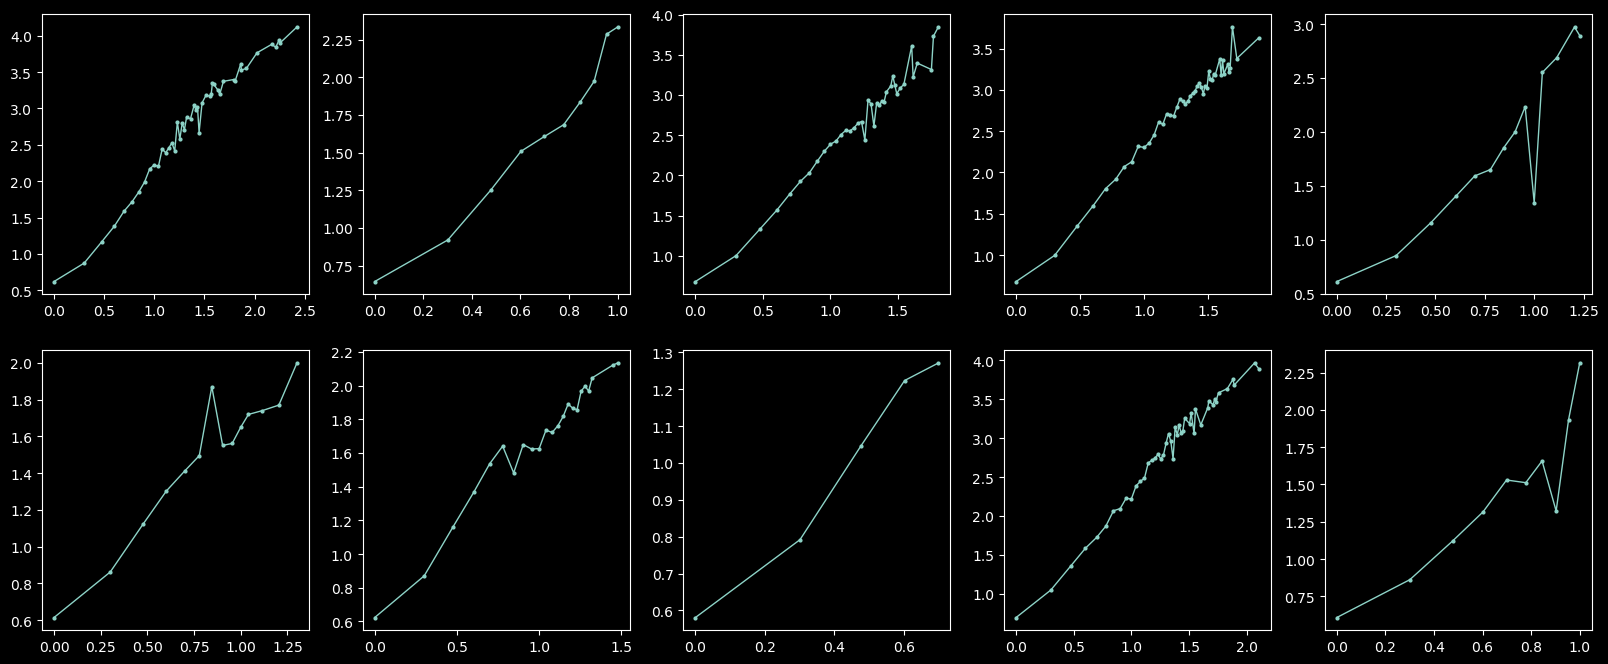

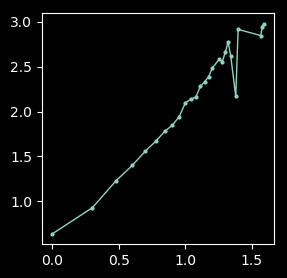

In [82]:
#PDF - SIZE VS DURATION
#----------------------
f, axarr = plt.subplots(2,5,figsize = (20,8))
yco = 0
xco = 0
for e in range(len(avlist)-1):
    if e == 5:
        xco = 0
        yco = 1
    avsize = np.load(avlist[e])[0]
    avdur = np.load(avlist[e])[1]
    sizevec = []
    for i in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == i)]))    
    xaxis = np.log10(np.unique(avdur))
    yaxis = np.log10(sizevec)
    axarr[yco,xco].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o-', linewidth = 1, markersize = 2)
    xco+=1

f, ax = plt.subplots(figsize = (3,3))
e = 10
avsize = np.load(avlist[e])[0]
avdur = np.load(avlist[e])[1]
sizevec = []
for i in np.unique(avdur):
    sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == i)]))    
xaxis = np.log10(np.unique(avdur))
yaxis = np.log10(sizevec)
plt.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o-', linewidth = 1, markersize = 2)

## PLOT3
* Power law (vs lognormal, exponential)
* exponents
* branching ratio

In [28]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
tp3_log = sorted(glob.glob('*sizeparam*tp3_log*')) 
tp3_exp = sorted(glob.glob('*sizeparam*tp3_exp*')) 
tp0_log = sorted(glob.glob('*sizeparam*tp0_log*')) 
p_log = sorted(glob.glob('sizeparam*p_log*')) 
p_exp = sorted(glob.glob('*sizeparam*p_exp*'))
p_log

['sizeparamsweepgroupp_log+.npy', 'sizeparamsweepgroupp_log.npy']

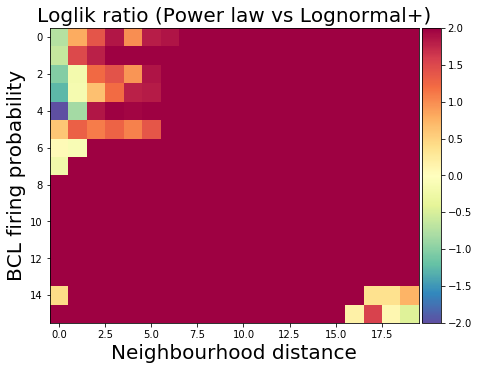

In [29]:
#powerlaw vs lognorm
#-----------------------------------
from mpl_toolkits.axes_grid1 import make_axes_locatable
f, axarr = plt.subplots(figsize = (7,14))
prac = np.load(g_p_lpos[0])[:,0]
nnbs = 20
bcls = np.int(prac.shape[0]/nnbs)
prac1 = prac.reshape((bcls,nnbs))    
plot1 = axarr.imshow(prac1, cmap = 'Spectral_r', vmin = -2, vmax = 2)
axarr.set_title('Loglik ratio (Power law vs Lognormal+)', size = '20')
axarr.set_xlabel('Neighbourhood distance', size = '20')
axarr.set_ylabel('BCL firing probability', size = '20')
divider = make_axes_locatable(axarr)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0)   
os.chdir(Ffig)
plt.savefig('powerlawlognorm+_matrix.png')
plt.show()

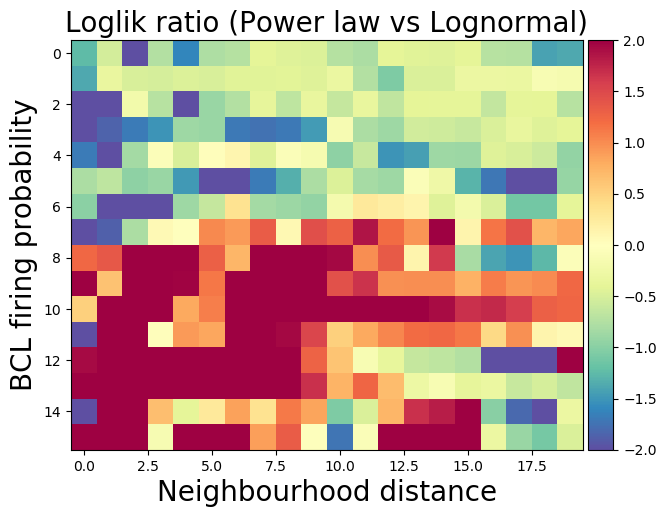

In [131]:
#powerlaw vs lognorm
#-----------------------------------
from mpl_toolkits.axes_grid1 import make_axes_locatable
f, axarr = plt.subplots(figsize = (7,14))
prac = np.load(p_log[0])[:,0]
nnbs = 20
bcls = np.int(prac.shape[0]/nnbs)
prac1 = prac.reshape((bcls,nnbs))    
plot1 = axarr.imshow(prac1, cmap = 'Spectral_r', vmin = -2, vmax = 2)
axarr.set_title('Loglik ratio (Power law vs Lognormal)', size = '20')
axarr.set_xlabel('Neighbourhood distance', size = '20')
axarr.set_ylabel('BCL firing probability', size = '20')
divider = make_axes_locatable(axarr)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0)   
os.chdir(Ffig)
plt.savefig('powerlaw_matrix.png')
plt.show()

In [128]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
po_log = sorted(glob.glob('*sizeparamsweepp_log*'))
po_log

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01sizeparamsweepp_log.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01sizeparamsweepp_log.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01sizeparamsweepp_log.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01sizeparamsweepp_log.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01sizeparamsweepp_log.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01sizeparamsweepp_log.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01sizeparamsweepp_log.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01sizeparamsweepp_log.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01sizeparamsweepp_log.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01sizeparamsweepp_log.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09sizeparamsweepp_log.npy']

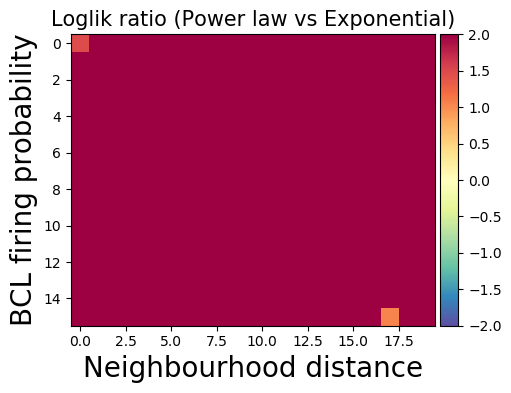

In [129]:
#powerlaw vs exponent
#-----------------------------------------
from mpl_toolkits.axes_grid1 import make_axes_locatable
f, axarr = plt.subplots(figsize = (5,9))
prac = np.load(p_exp[0])[:,0]
nnbs = 20
bcls = np.int(prac.shape[0]/nnbs)
prac1 = prac.reshape((bcls,nnbs))    
plot1 = axarr.imshow(prac1, cmap = 'Spectral_r', vmin = -2, vmax = 2)
axarr.set_title('Loglik ratio (Power law vs Exponential)', size = '15')
axarr.set_xlabel('Neighbourhood distance', size = '20')
axarr.set_ylabel('BCL firing probability', size = '20') 
divider = make_axes_locatable(axarr)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0)    
os.chdir(Ffig)
plt.savefig('powerlawexp_matrix.png')
plt.show()

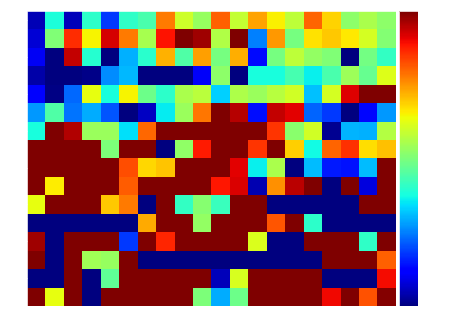

In [56]:
#truncated powerlaw (xmin only)  vs lognorm
#---------------------------------------------
from mpl_toolkits.axes_grid1 import make_axes_locatable
f, axarr = plt.subplots(figsize = (7,14))
prac = np.load(tp0_log[0])[:,0]
nnbs = 20
bcls = np.int(prac.shape[0]/nnbs)
prac1 = prac.reshape((bcls,nnbs))    
plot1 = axarr.imshow(prac1, cmap = 'jet', vmin = -2, vmax = 2)
divider = make_axes_locatable(axarr)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0)    

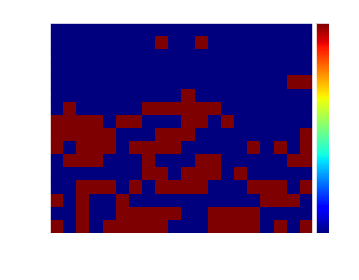

In [57]:
#truncated powerlaw (xmin only)  vs lognorm
#-------------------------------------------
f, axarr = plt.subplots(figsize = (5,9))
wherep = np.where(np.load(tp0_log[0])[:,0] > 0)
wherepv = np.where(np.load(tp0_log[0])[:,1] < 0.05)
wherepow = np.intersect1d(wherep, wherepv)
llr = np.zeros(np.load(tp0_log[0]).shape[0])
llr[wherepow] = 1
nnbs = 20
bcls = np.int(llr.shape[0]/nnbs)
llr = llr.reshape((bcls,nnbs))    
plot1 = axarr.imshow(llr, cmap = 'jet', vmin = 0, vmax = 1)
axarr.set_title('12 exponent ')
axarr.set_xlabel('nnb', size = '20')
axarr.set_ylabel('P(firing)', size = '20')
axarr.locator_params(axis='y', nbins=21)
axarr.locator_params(axis='x', nbins=20)
divider = make_axes_locatable(axarr)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0)    

In [124]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
tp_log = sorted(glob.glob('*sizeparamsweep*group*tp3_log*'))
tp_log

['sizeparamsweepgrouptp3_log.npy']

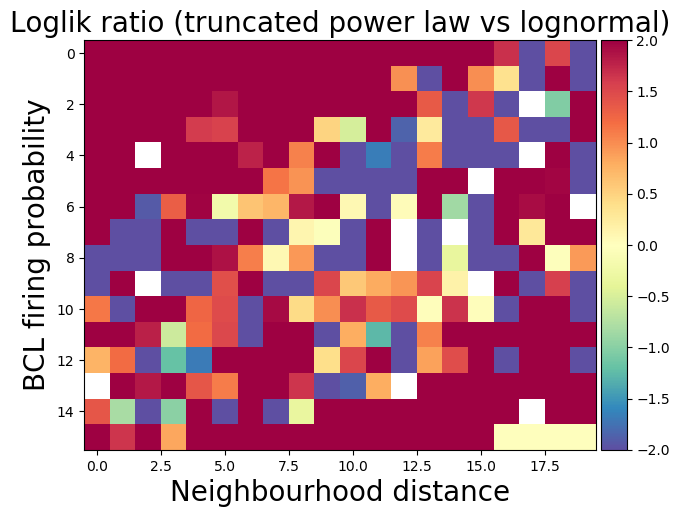

In [125]:
#truncated powerlaw (cut = 3) vs lognorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
f, axarr = plt.subplots(figsize = (7,14))
prac = np.load(tp_log[0])[0]
nnbs = 20
bcls = np.int(prac.shape[0]/nnbs)
prac1 = prac.reshape((bcls,nnbs))    
plot1 = axarr.imshow(prac1, cmap = 'Spectral_r', vmin = -2, vmax = 2)
axarr.set_title('Loglik ratio (truncated power law vs lognormal)', size = '20')
axarr.set_xlabel('Neighbourhood distance', size = '20')
axarr.set_ylabel('BCL firing probability', size = '20')
divider = make_axes_locatable(axarr)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0)    
os.chdir(Ffig)
plt.savefig('truncatedpowerlawvslognorm_matrix.png')
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


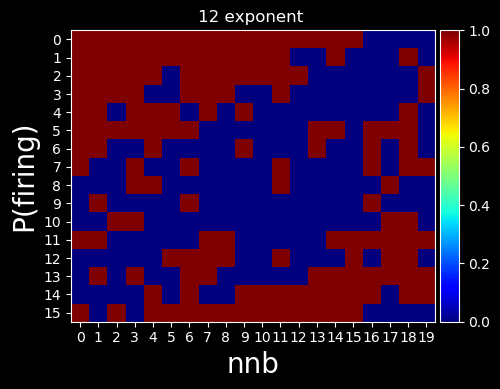

In [402]:
#GROUPWISE: POWERLAW VS LOGNORMAL 
#================================
f, axarr = plt.subplots(figsize = (5,9))
wherep = np.where(np.load(lognorm[0])[0,:] > 0)
wherepv = np.where(np.load(lognorm[0])[1,:] < 0.05)
wherepow = np.intersect1d(wherer, wherepv)
llr = np.zeros(np.load(lognorm[0]).shape[1])
llr[wherepow] = 1
nnbs = 20
bcls = np.int(llr.shape[0]/nnbs)
llr = llr.reshape((bcls,nnbs))    
plot1 = axarr.imshow(llr, cmap = 'jet', vmin = 0, vmax = 1)
axarr.set_title('12 exponent ')
axarr.set_xlabel('nnb', size = '20')
axarr.set_ylabel('P(firing)', size = '20')
axarr.locator_params(axis='y', nbins=21)
axarr.locator_params(axis='x', nbins=20)
divider = make_axes_locatable(axarr)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0)    

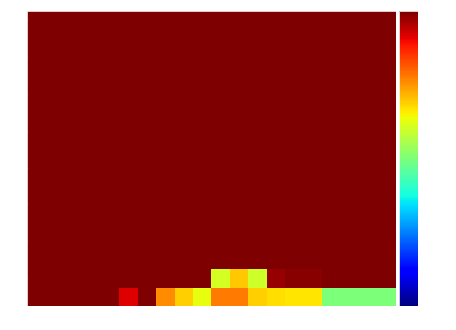

In [37]:
#truncated powerlaw (cut = 3) vs exponent
#-----------------------------------------
from mpl_toolkits.axes_grid1 import make_axes_locatable
f, axarr = plt.subplots(figsize = (7,14))
prac = np.load(tp_exp[0])[0]
nnbs = 20
bcls = np.int(prac.shape[0]/nnbs)
prac1 = prac.reshape((bcls,nnbs))    
plot1 = axarr.imshow(prac1, cmap = 'jet', vmin = -2, vmax = 2)
divider = make_axes_locatable(axarr)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0)    

In [162]:
co

['sizeparamsweepgrouptp0_log.npy',
 'sizeparamsweepgrouptp10_log.npy',
 'sizeparamsweepgrouptp3_log.npy',
 'sizeparamsweepgrouptp5_log.npy']

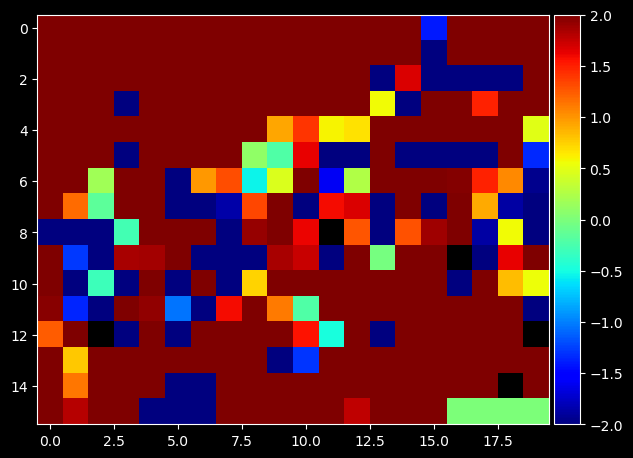

In [164]:
#truncated powerlaw (cut = 5) vs lognorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
f, axarr = plt.subplots(figsize = (7,14))
prac = np.load(co[3])[:,0]
nnbs = 20
bcls = np.int(prac.shape[0]/nnbs)
prac1 = prac.reshape((bcls,nnbs))    
plot1 = axarr.imshow(prac1, cmap = 'jet', vmin = -2, vmax = 2)
divider = make_axes_locatable(axarr)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0)    

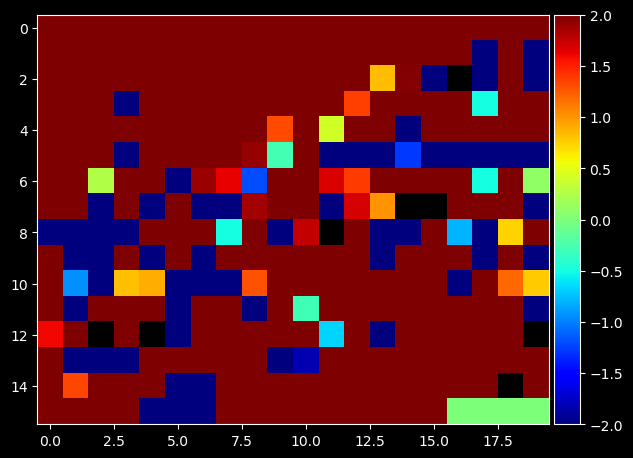

In [165]:
#truncated powerlaw (cut = 10) vs lognorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
f, axarr = plt.subplots(figsize = (7,14))
prac = np.load(co[1])[:,0]
nnbs = 20
bcls = np.int(prac.shape[0]/nnbs)
prac1 = prac.reshape((bcls,nnbs))    
plot1 = axarr.imshow(prac1, cmap = 'jet', vmin = -2, vmax = 2)
divider = make_axes_locatable(axarr)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0)    

### Branching ratio

In [ ]:
#CALCULATE BRANCHING RATIO

import numpy as np
import os
    
branchlist = list(range(len(pkglist)))
    
for y in range(len(pkglist)):
    pkg = np.load(pkglist[y])[3000:4000]
    brancharr = np.zeros((np.int(np.max(pkg)), np.max(np.load(avlist[y])[1])))
    #brancharr = np.zeros((np.load(avlist[y])[1].shape[0], np.max(np.load(avlist[y])[1]))) #empty array of size: number of avalanches x max number of frames
    #indexlist = np.unique(pkg)[np.where(np.unique(pkg,return_counts = True)[1][1:] >=3)[0]] #list of all avalanche marker values >=3, ordered - index can be used for filling brancharr in order
    i = 0
        
    for t in range(pkg.shape[1]): #loop through all time points
        if t == pkg.shape[1]-1:
            break
        n1 = np.unique(pkg[:,t])  #unique marker values at each time point
        n2 = np.unique(pkg[:,t+1]) 
        nx = np.intersect1d(n1, n2) #marker values that continue to next time frame
    
        if i% round(10*pkg.shape[1]/100) == 0: print('doing time step ' + str(i) + ' of ' + str(pkg.shape[1]) + ' for fish ' + str(y))
        i = i+1

        for mark in nx[1:]: #loop through each marker value at this time point (only if marker active in next time point)
            mark = np.int(mark)
            ancestor = np.unique(pkg[:,t], return_counts = True)[1][np.where(np.unique(pkg[:,t], return_counts = True)[0] == mark)[0]][0] #number of cells in that avalanche for that marker value at time point t  
            descend = np.unique(pkg[:,t+1], return_counts = True)[1][np.where(np.unique(pkg[:,t+1], return_counts = True)[0] == mark)[0]][0] #same as above for next time point
            #index = np.where(indexlist == mark)[0] #find index in brancharr list
            brancharr[mark, np.where(brancharr[mark] == 0)[0][0]] = (descend/ancestor)
    branchlist[y] = np.mean(brancharr[np.where(brancharr > 0)])